In [118]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hr-analytics/HR_comma_sep.csv


## Importing Libraries

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [120]:
from sklearn.model_selection import train_test_split

## Loading Dataset

In [121]:
df = pd.read_csv('/kaggle/input/hr-analytics/HR_comma_sep.csv')

In [122]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [123]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [124]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

## Checking Factors affecting employee retention

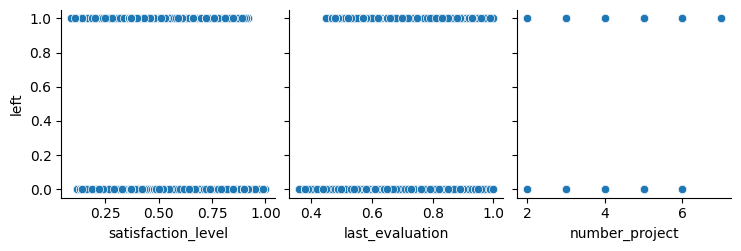

In [125]:
sns.pairplot(data = df,x_vars = ['satisfaction_level', 'last_evaluation', 'number_project'],y_vars = 'left',kind= 'scatter')
plt.show()

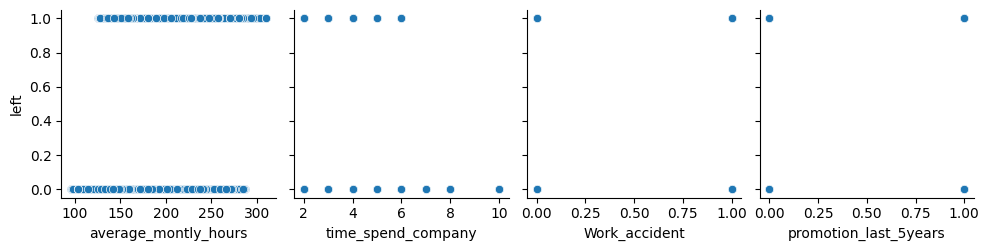

In [126]:
sns.pairplot(data = df,x_vars = ['average_montly_hours', 'time_spend_company', 'Work_accident','promotion_last_5years'],
             y_vars = 'left',kind= 'scatter')
plt.show()

In [127]:
df_numeric = df.iloc[:,:-2]
df_numeric

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0
...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0
14995,0.37,0.48,2,160,3,0,1,0
14996,0.37,0.53,2,143,3,0,1,0
14997,0.11,0.96,6,280,4,0,1,0


In [128]:
df_numeric.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


**Observation : Mean of staisfaction level, average monthly hours, promotion in last 5 years in case of leaving company or not, is more compratively.**

**As we can see our outcome variable is continous, so we have to use logistic regression.**

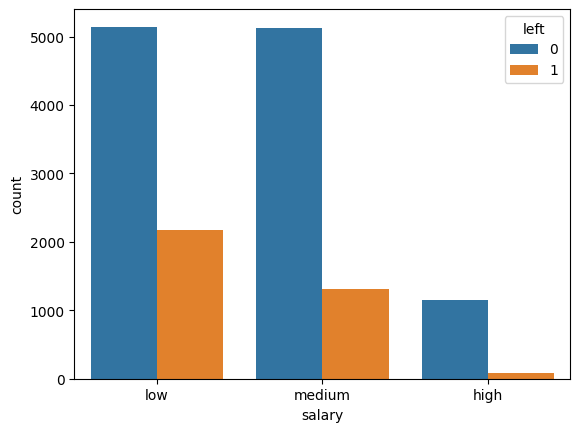

In [129]:
sns.countplot(data = df, x = 'salary',hue='left')
plt.show()

**We can observe that ratio of person leaving the company and remaining in the company is very differnt in each pay category. So, we can include salary factor.**

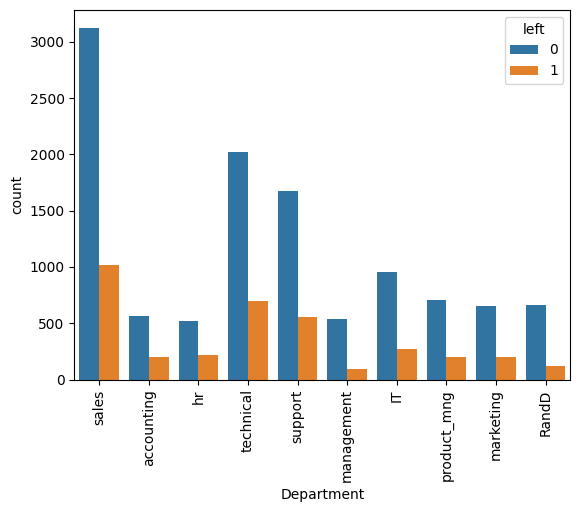

In [130]:
sns.countplot(data = df, x = 'Department',hue='left')
plt.xticks(rotation =90)
plt.show()

**We can observe that ratio of person leaving the company and remaining in the company somewhat same in every department. So, we can safely ignore this factor.**

## Preparing data for Training the model : converting salary into dummies

In [131]:
salary_dummies = pd.get_dummies(df['salary'],dtype = int)
salary_dummies

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [132]:
df_with_dummies = pd.concat([df,salary_dummies],axis = 'columns')

In [133]:
df_with_dummies

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,high,low,medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,support,low,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,support,low,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,support,low,0,1,0


**We are removing medium, to get out of dummy trap,however sklearn already take care of it.**

In [134]:
df_with_dummies.drop(columns =['salary','medium'],inplace = True)

In [135]:
df_with_dummies

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,high,low
0,0.38,0.53,2,157,3,0,1,0,sales,0,1
1,0.80,0.86,5,262,6,0,1,0,sales,0,0
2,0.11,0.88,7,272,4,0,1,0,sales,0,0
3,0.72,0.87,5,223,5,0,1,0,sales,0,1
4,0.37,0.52,2,159,3,0,1,0,sales,0,1
...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,0,1
14995,0.37,0.48,2,160,3,0,1,0,support,0,1
14996,0.37,0.53,2,143,3,0,1,0,support,0,1
14997,0.11,0.96,6,280,4,0,1,0,support,0,1


In [136]:
x = df_with_dummies[['satisfaction_level','average_montly_hours','promotion_last_5years','high','low']].values
y = df_with_dummies['left']

## Training the model

In [197]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

In [198]:
model = LogisticRegression()

In [199]:
model.fit(x,y)

LogisticRegression()

## Prediction and accuracy

In [200]:
result = model.predict(x_test)

In [201]:
data = {'left':result}
left = pd.DataFrame(data)

In [202]:
predicted_df = pd.concat([pd.DataFrame(x_test),left],axis = 'columns')

In [203]:
predicted_df

,0,1,2,3,4,left
0,0.77,201.0,0.0,1.0,0.0,0
1,0.09,275.0,0.0,0.0,0.0,1
2,0.73,262.0,0.0,0.0,1.0,0
3,0.77,214.0,0.0,1.0,0.0,0
4,0.37,160.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...
2995,0.43,142.0,0.0,0.0,0.0,0
2996,0.86,182.0,0.0,0.0,0.0,0
2997,0.85,139.0,0.0,0.0,1.0,0
2998,0.59,172.0,0.0,0.0,0.0,0


In [204]:
model.predict([[0.99,300,1,1,0]])

array([0])

In [205]:
model.predict([[0.99,100,1,1,0]])

array([0])

In [206]:
model.predict([[0.99,300,1,0,0]])

array([0])

In [207]:
model.predict([[0.1,300,1,1,0]])

array([0])

In [208]:
model.score(x_test,y_test)

0.7633333333333333